## Datensatz
Datensatz für Vorhersagen das Überleben von Patienten mit Herzinsuffizienz anhand von medizinische Merkmale wie Serumkreatinin, Ejektionsfraktion, ....

### Import von Bibliotheken

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')



### Import der Datensatz

In [2]:

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df = data.copy()

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Data Visualization

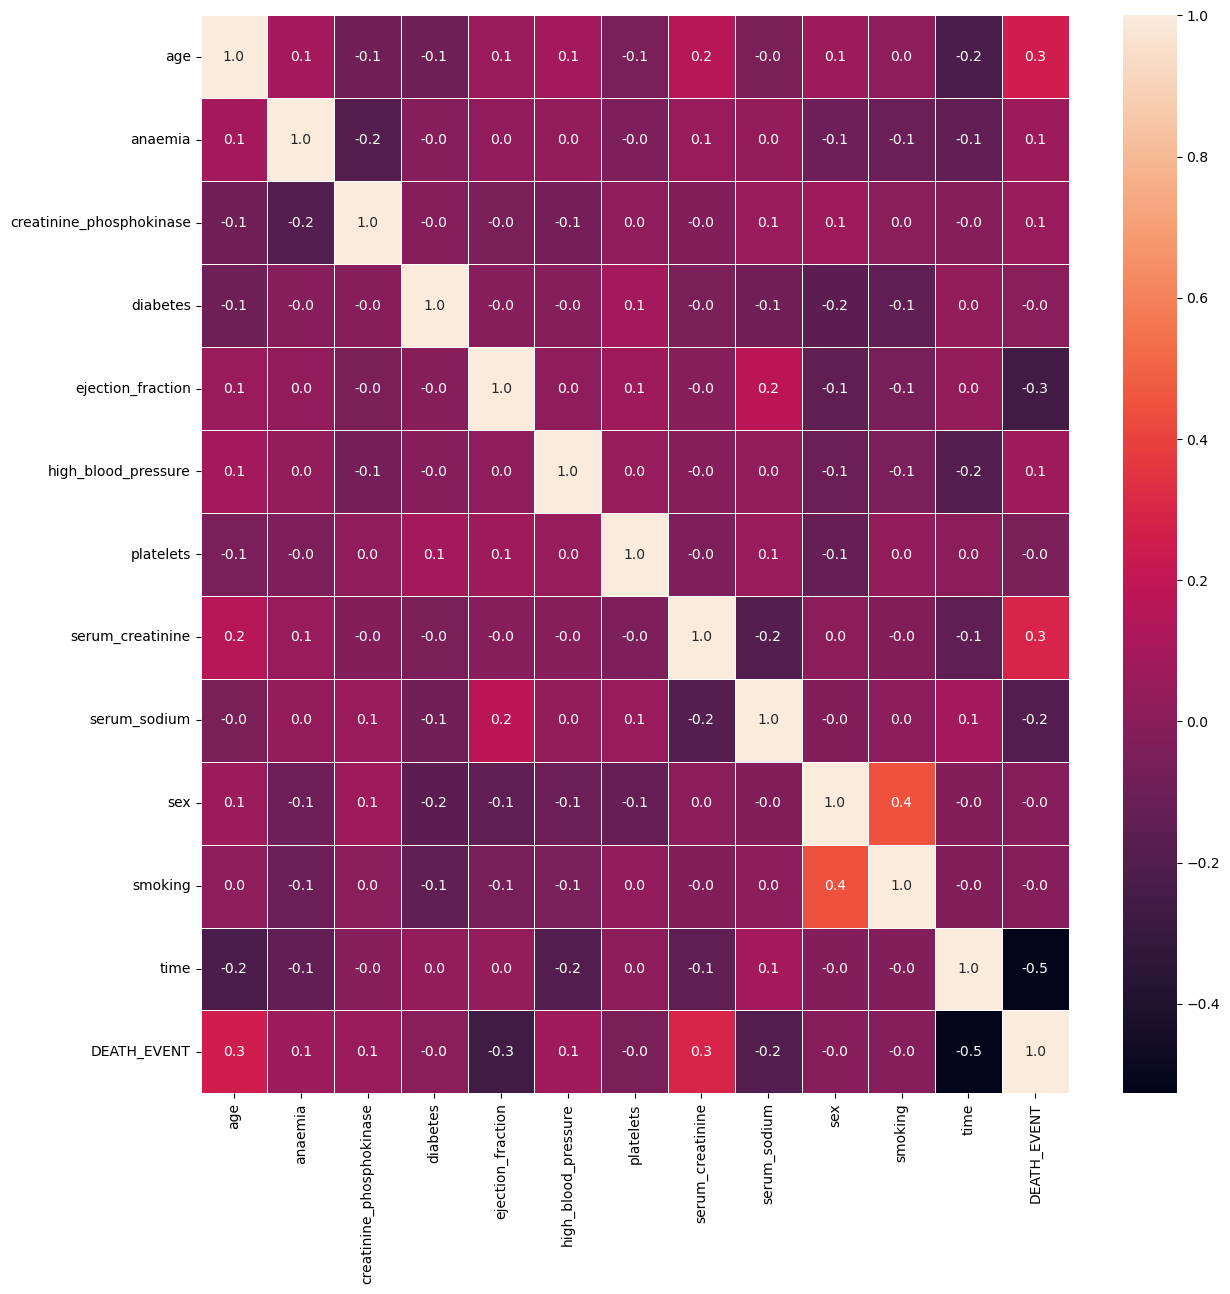

In [4]:
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt=".1f", ax=ax)
plt.show()

## Model Construction

In [5]:
inp_data = data.drop(data[['DEATH_EVENT']], axis=1)
out_data = data[['DEATH_EVENT']]

scaler = StandardScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42)

In [6]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


Train/Test split results:
LogisticRegression accuracy is 0.800
LogisticRegression log_loss is 0.555
LogisticRegression auc is 0.825


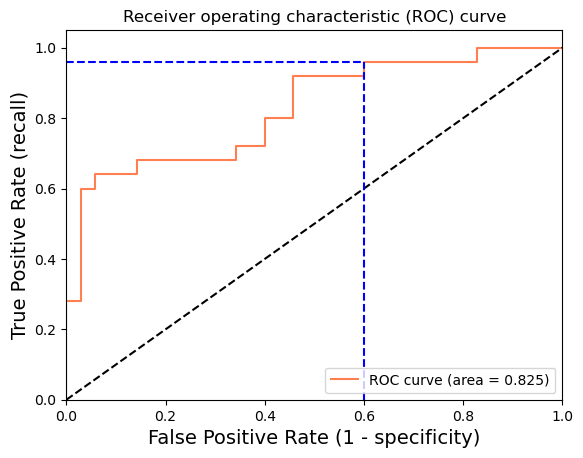

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


<AxesSubplot:>

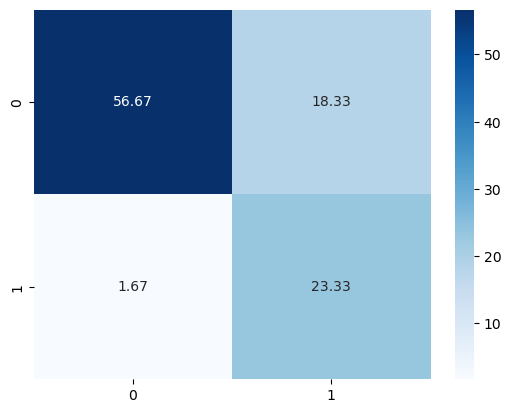

In [8]:
cf_matrix = confusion_matrix(y_pred.T, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

**Support Vector Machine Algorithm**
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>

In [9]:
from sklearn.svm import SVC
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7500
SVC f1-score  : 0.6154
SVC precision : 0.4800
SVC recall    : 0.8571

               precision    recall  f1-score   support

           0       0.94      0.72      0.81        46
           1       0.48      0.86      0.62        14

    accuracy                           0.75        60
   macro avg       0.71      0.79      0.72        60
weighted avg       0.83      0.75      0.77        60



In [10]:
# find best parameters with SVC | Step 1
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.01, 0.1, 1])
clf = SVC()
clf.fit(X_train, y_train) 
param_grid = dict(kernel=kernels, C=c)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

{'C': 0.1, 'kernel': 'linear'}

In [11]:
clf = SVC(C=0.1, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7833
SVC f1-score  : 0.6667
SVC precision : 0.5200
SVC recall    : 0.9286

               precision    recall  f1-score   support

           0       0.97      0.74      0.84        46
           1       0.52      0.93      0.67        14

    accuracy                           0.78        60
   macro avg       0.75      0.83      0.75        60
weighted avg       0.87      0.78      0.80        60



Random Forest ist ein Gemeinschaftsmodell, bei dem mehrere Entscheidungsbäume kombiniert werden, um ein stärkeres Modell zu erhalten. Das daraus abgeleitete Modell ist robuster und genauer und kann mit Überanpassungen besser umgehen als konstitutive Modelle.

## Grundlegende Theorie
Random Forest besteht aus einer Reihe von Entscheidungsbäumen, die mit der "Bagging-Methode" kombiniert werden, um Klassifizierungs- und Regressionsergebnisse zu erhalten. Bei der Klassifizierung wird die Ausgabe anhand der Mehrheitsentscheidung berechnet, während bei der Regression der Durchschnitt berechnet wird.

Random Forest erstellt ein robustes und genaues Modell, das eine Vielzahl von Eingabedaten mit binären, kategorialen und kontinuierlichen Merkmalen verarbeiten kann.

![](https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)


Accuracy Score: 0.7667
Random Forest Classifier f1-score      : 0.6500
Random Forest Classifier precision     : 0.8667
Random Forest Classifier recall        : 0.5200
Random Forest Classifier roc auc score : 0.7314

               precision    recall  f1-score   support

           0       0.94      0.73      0.83        45
           1       0.52      0.87      0.65        15

    accuracy                           0.77        60
   macro avg       0.73      0.80      0.74        60
weighted avg       0.84      0.77      0.78        60



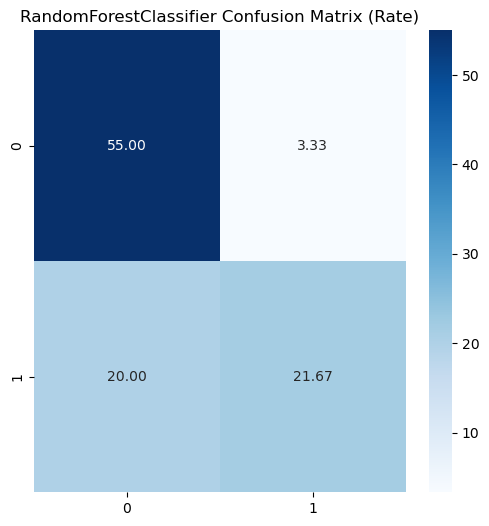

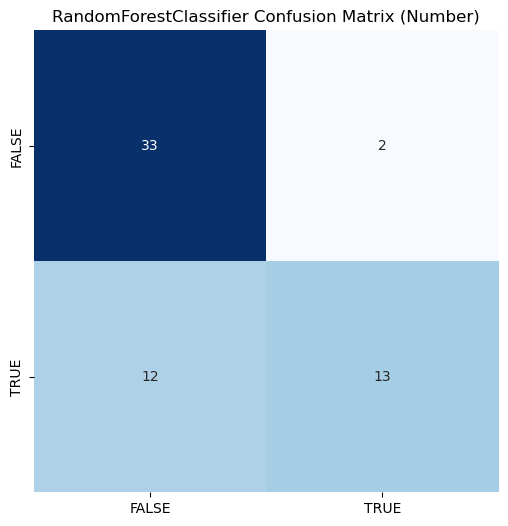

In [12]:
# Import the necessary packages
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
    
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))
    
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("RandomForestClassifier Confusion Matrix (Rate)")
plt.show()
    
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=False)
plt.title("RandomForestClassifier Confusion Matrix (Number)")
plt.show()

In [13]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarni

KeyboardInterrupt: 

In [ ]:
clf = RandomForestClassifier(
    n_estimators=1000,
    max_features=0.5,
    max_depth=3,
    min_samples_split=5,
    random_state=0
)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))
    
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("RandomForestClassifier Confusion Matrix (Rate)")
plt.show()
    
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=False)
plt.title("RandomForestClassifier Confusion Matrix (Number)")
plt.show()

## Deep Learning


In [ ]:

from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 16, epochs = 80, validation_split=0.25)



val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()


print(classification_report(y_test, y_pred))

# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})



